# INSTALL ALL RELEVANT PACKAGES

In [360]:
# IMPORT RELEVANT PACKAGES
!pip install fuzzywuzzy python-Levenshtein scikit-learn geonamescache psutil
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz, process
from sklearn.cluster import DBSCAN
import geonamescache
from multiprocessing import Pool, cpu_count
import psutil

In [361]:
# IMPORT OPPORTUNITY DATASET
file_path = pd.read_csv('/content/Opportunity_Data.csv', header = 0, sep = ',')

In [362]:
file_path.head(5)

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Female,Amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37","Jan 05, 2023, 18:52:39",200.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Female,Satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 8:10:07","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN


In [363]:
file_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20322 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profile Id                20322 non-null  object 
 1   Opportunity Id            20322 non-null  object 
 2   Opportunity Name          20322 non-null  object 
 3   Opportunity Category      20322 non-null  object 
 4   Opportunity End Date      20322 non-null  object 
 5   Gender                    20321 non-null  object 
 6   City                      20321 non-null  object 
 7   State                     20308 non-null  object 
 8   Country                   20322 non-null  object 
 9   Zip Code                  20309 non-null  object 
 10  Graduation Date(YYYY MM)  20321 non-null  object 
 11  Current Student Status    20321 non-null  object 
 12  Current/Intended Major    20278 non-null  object 
 13  Status Description        20322 non-null  object 
 14  Apply 

The dataset contains 20322 Rows and 21 Columns. The date columns are not consistent and would have to be converted to Datetime.

In [364]:
file_path.isna().sum()

,0
Profile Id,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,0
Gender,1
City,1
State,14
Country,0
Zip Code,13


In [365]:
file_path.duplicated().sum()

0

There are no duplicated value. However, there are missing data on the Gender, City, State, Zip Code, Graduation Date, Current Student Status, Current/Intended Major, Opportunity Start Date, Reward Amount, Badge ID, Badge Name, Skill Points Earned and Skills Earned columns. The data formats are also not consistent for the Date columns.

In [366]:
file_path.describe(include='all')

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
count,20322,20322,20322,20322,20322,20321,20321,20308,20322,20309,...,20321,20278,20322,20322,19518,2521.000000,2521,2521,2521.000000,2521
unique,11481,33,33,5,29,4,3141,1370,108,5189,...,4,968,8,20277,51,NaN,56,56,NaN,24
top,18e1e6bc-fada-4b09-bf52-ab45daf318f4,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization,Internship,"Jan 01, 2024, 3:30:46",Male,Saint Louis,Missouri,India,63108,...,Graduate Program Student,Computer Science,Team Allocated,"Aug 29, 2023, 5:30:24","Aug 07, 2023, 4:30:00",NaN,00000000-10GX-D9CF-HZB9-KBFXGW,Data Visualization Virtual Internship Completed,NaN,"[""Critical Thinking"",""Creative Thinking"",""Coll..."
freq,22,5687,5687,15360,14938,12240,1326,2115,9132,1831,...,9297,2654,14206,3,2323,NaN,377,377,NaN,1373
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1081.261404,NaN,NaN,1186.964697,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,927.251398,NaN,NaN,399.172150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,10.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,1182.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,1182.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2500.000000,NaN,NaN,1182.000000,NaN


# DATA WRANGLING

In [367]:
df = file_path.copy()

In [368]:
# Convert all Date Columns to datetime
for col in ['Apply Date', 'Opportunity Start Date', 'Opportunity End Date', 'Graduation Date(YYYY MM)']:
    # Convert the column to datetime objects
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [369]:
df[['Graduation Date(YYYY MM)', 'Opportunity Start Date', 'Opportunity End Date', 'Apply Date']].agg(['min', 'max'])

,Graduation Date(YYYY MM),Opportunity Start Date,Opportunity End Date,Apply Date
min,1987-12-01,2022-06-13 04:41:02,2022-10-27 18:29:00,2022-10-01 14:03:09
max,2037-10-01,2024-05-31 07:04:54,2025-12-06 10:26:00,2023-11-15 12:41:58


In [370]:
for col in ['Apply Date', 'Opportunity Start Date', 'Opportunity End Date', 'Graduation Date(YYYY MM)']:
    print(f"Value counts for {col} grouped by year:")
    print(df[col].dt.year.value_counts().sort_index())
    print("\n")

Value counts for Apply Date grouped by year:
Apply Date
2022.0      688
2023.0    19171
Name: count, dtype: int64


Value counts for Opportunity Start Date grouped by year:
Opportunity Start Date
2022.0     1666
2023.0    15589
2024.0     2263
Name: count, dtype: int64


Value counts for Opportunity End Date grouped by year:
Opportunity End Date
2022       22
2023     4015
2024    16152
2025      133
Name: count, dtype: int64


Value counts for Graduation Date(YYYY MM) grouped by year:
Graduation Date(YYYY MM)
1987.0       1
1988.0       1
1989.0       6
1990.0       1
1991.0       3
1992.0       1
1994.0       2
1995.0       4
1997.0       3
1998.0       4
1999.0       1
2000.0      11
2001.0      13
2002.0      21
2003.0       5
2004.0      37
2005.0      26
2006.0      18
2007.0      38
2008.0      61
2009.0      50
2010.0      72
2011.0      52
2012.0     129
2013.0      78
2014.0     133
2015.0     190
2016.0     309
2017.0     345
2018.0     530
2019.0     632
2020.0     776
2021

In [371]:
# Count Dates that are out of scope for the Analysis
filteredgrad_df = df[
    (df['Graduation Date(YYYY MM)'].dt.year >= 1987) &
    (df['Graduation Date(YYYY MM)'].dt.year <= 2037) &
    ~(df['Graduation Date(YYYY MM)'].dt.year.isin([2022, 2023, 2024, 2025, 2026]))
]

# Count the filtered data
count = len(filteredgrad_df)
print(f"Number of data entries within the specified range: {count}")

Number of data entries within the specified range: 5630


In [372]:
# Filter data to keep only rows within the desired range
filtered_df = df[
    (df['Graduation Date(YYYY MM)'].dt.year >= 2022) &
    (df['Graduation Date(YYYY MM)'].dt.year <= 2026)
]

# Update the original DataFrame (optional)
df = filtered_df

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14691 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Profile Id                14691 non-null  object        
 1   Opportunity Id            14691 non-null  object        
 2   Opportunity Name          14691 non-null  object        
 3   Opportunity Category      14691 non-null  object        
 4   Opportunity End Date      14691 non-null  datetime64[ns]
 5   Gender                    14691 non-null  object        
 6   City                      14691 non-null  object        
 7   State                     14680 non-null  object        
 8   Country                   14691 non-null  object        
 9   Zip Code                  14680 non-null  object        
 10  Graduation Date(YYYY MM)  14691 non-null  datetime64[ns]
 11  Current Student Status    14691 non-null  object        
 12  Current/Intended Major 

In [374]:
# Fill missing 'Gender', 'City', 'State', 'Zip Code", Current Student Status and Current/Intended Major with the most occuring value(Mode) in their columns
for col in ['Gender', 'City', 'State', 'Zip Code', 'Current Student Status', 'Current/Intended Major']:
  df[col] = df[col].fillna(df[col].mode()[0])


<ipython-input-374-313401973e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [375]:
# Fill missing values in the Reward Amount and Skills Earned columns with 0
# First check if there are any missing value for Columns that had Rewards. That way, we would know if the Reward Award and Skill Points Earned have any null entries
rewards = df[df['Status Description'] == 'Rewards Award']
rewards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1716 entries, 5 to 20061
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Profile Id                1716 non-null   object        
 1   Opportunity Id            1716 non-null   object        
 2   Opportunity Name          1716 non-null   object        
 3   Opportunity Category      1716 non-null   object        
 4   Opportunity End Date      1716 non-null   datetime64[ns]
 5   Gender                    1716 non-null   object        
 6   City                      1716 non-null   object        
 7   State                     1716 non-null   object        
 8   Country                   1716 non-null   object        
 9   Zip Code                  1716 non-null   object        
 10  Graduation Date(YYYY MM)  1716 non-null   datetime64[ns]
 11  Current Student Status    1716 non-null   object        
 12  Current/Intended Major  

All data entries that were Rewarded got a reward award and earned a Skill Point. Next, you fill missing values in the Reward Award and Skill Point Earned with 0

In [376]:
df['Reward Amount'] = df['Reward Amount'].fillna(0)
df['Skill Points Earned'] = df['Skill Points Earned'].fillna(0)

In [377]:
# Fill Badge Id, Badge Name and Skills Earned with N/A (Not Available)
df['Badge Id'] = df['Badge Id'].fillna('N/A')
df['Badge Name'] = df['Badge Name'].fillna('N/A')
df['Skills Earned'] = df['Skills Earned'].fillna('N/A')

In [378]:
# Check if all missing data entries have been imputed
df.isna().sum()

,0
Profile Id,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,0
Gender,0
City,0
State,0
Country,0
Zip Code,0


All imputations worked. However, converting all date columns to datetime removed all invalid dates and we would have to fill in the new misssing values.

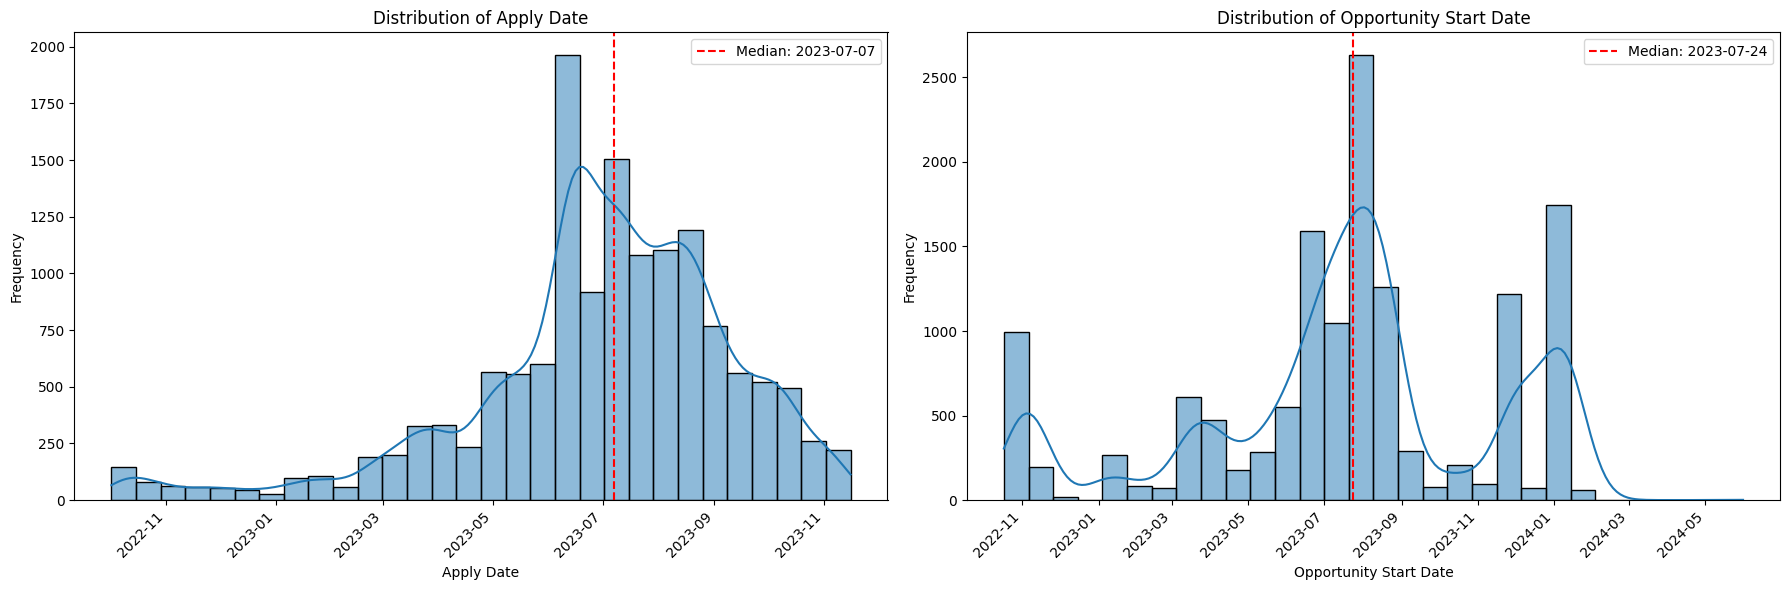

In [379]:
date_columns = ['Apply Date', 'Opportunity Start Date']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 3 columns of subplots

for i, column in enumerate(date_columns):

    # Calculate median for the column (ignoring NaT values)
    median_value = np.nanmedian(df[column].dropna().astype('int64'))

    # Convert median back to datetime for plotting
    median_date = pd.to_datetime(median_value)

    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Add vertical line for median
    axes[i].axvline(median_date, color='red', linestyle='--', label=f'Median: {median_date.strftime("%Y-%m-%d")}')

    # Rotate x-axis tick labels and set horizontal alignment
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Display the legend
    axes[i].legend()

plt.tight_layout()
plt.show()

Since your date range is over two year and the events are fairly spread out, using the Median is a good way to avoid skewing too heavily toward a particular part of the year. the median will provide a balanced and neutral imputation.

In [380]:
for column in date_columns:
    df[column] = df[column].fillna(df[column].median())

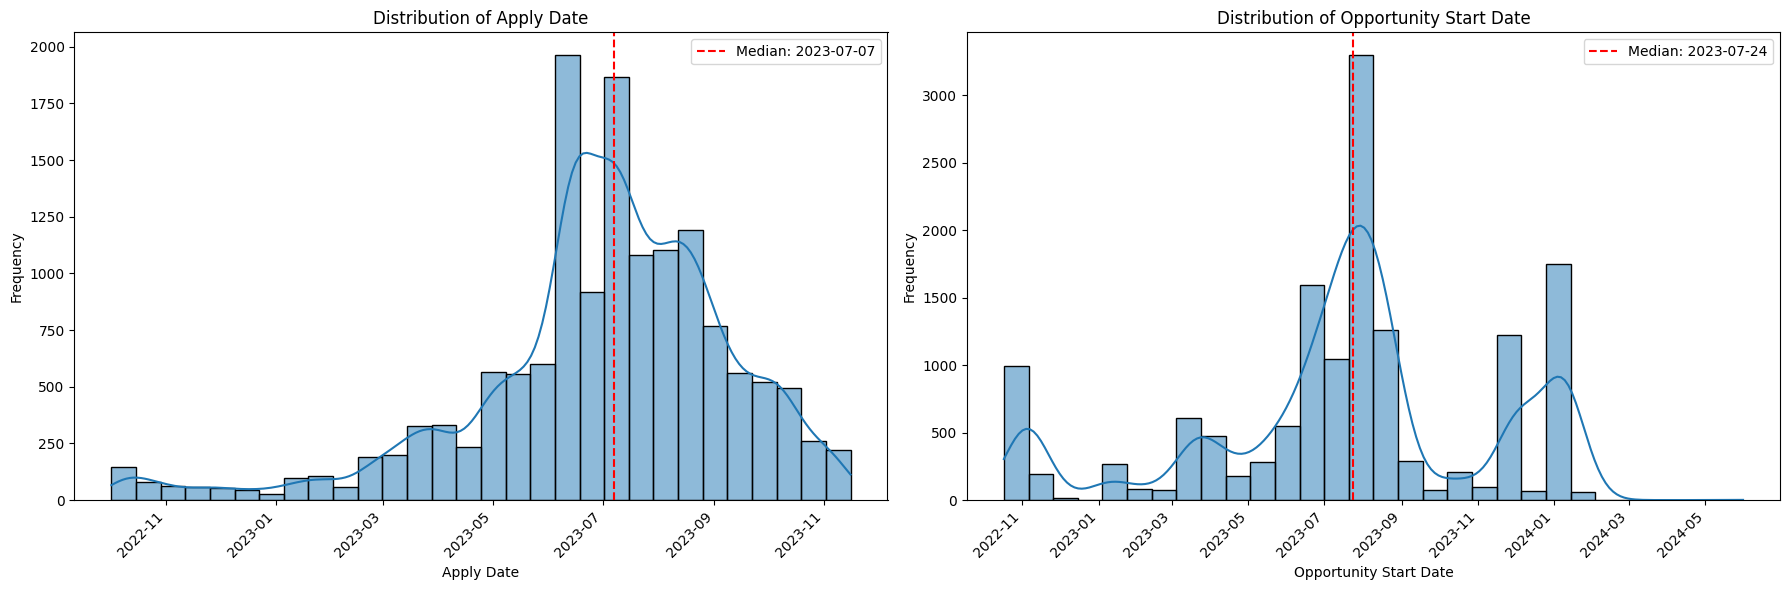

In [381]:
date_columns = ['Apply Date', 'Opportunity Start Date']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 3 columns of subplots

for i, column in enumerate(date_columns):

    # Calculate median for the column (ignoring NaT values)
    median_value = np.nanmedian(df[column].dropna().astype('int64'))

    # Convert median back to datetime for plotting
    median_date = pd.to_datetime(median_value)

    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Add vertical line for median
    axes[i].axvline(median_date, color='red', linestyle='--', label=f'Median: {median_date.strftime("%Y-%m-%d")}')

    # Rotate x-axis tick labels and set horizontal alignment
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Display the legend
    axes[i].legend()

plt.tight_layout()
plt.show()

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14691 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Profile Id                14691 non-null  object        
 1   Opportunity Id            14691 non-null  object        
 2   Opportunity Name          14691 non-null  object        
 3   Opportunity Category      14691 non-null  object        
 4   Opportunity End Date      14691 non-null  datetime64[ns]
 5   Gender                    14691 non-null  object        
 6   City                      14691 non-null  object        
 7   State                     14691 non-null  object        
 8   Country                   14691 non-null  object        
 9   Zip Code                  14691 non-null  object        
 10  Graduation Date(YYYY MM)  14691 non-null  datetime64[ns]
 11  Current Student Status    14691 non-null  object        
 12  Current/Intended Major 

The dataset have been properly cleaned and is ready for further exploration.

In [383]:
# To ensure data consistency, standardize the format of the text values (e.g., consistent capitalization, removing extra spaces).
#This helps in avoiding errors in analysis and visualization.
dirty_columns = ['City', 'State', 'Country', 'Gender', 'Current Student Status', 'Status Description', 'Current/Intended Major', 'Badge Name']
for col in dirty_columns:
  df[col] = df[col].astype(str).str.strip().str.title()
  df[col] = df[col].str.replace('  ', ' ')

In [384]:
geography = df[['City', 'State', 'Country']]
geography.head(20).sort_values(by='City')

,City,State,Country
6,Agra,Uttar Pradesh,India
11,Bangalore,Karnataka,India
4,Bangalore,Karnataka,India
0,Dhaka,Savar,Bangladesh
9,Hyderabad,Telangana,India
13,Hyderabad,Telangana,India
16,Hyderabad,Telangana,India
17,Hyderabad,Telangana,India
3,Hyderabad,Telangana,India
10,Janakpurdham,Madhesh Pradesh,Nepal


In [385]:
df['Country'] = df['Country'].str.replace('Iran  Islamic Republic Of Persian Gulf', 'Iran, Islamic Republic Of Persian Gulf')
df['Country'] = df['Country'].str.replace('Congo  The Democratic Republic Of The Congo', 'Congo, The Democratic Republic Of The Congo')


In [386]:
df['City'].unique().tolist()

['Dhaka',
 'Satna',
 'Hyderabad',
 'Bangalore',
 'Saint Louis',
 'Agra',
 'Port Harcourt',
 'Janakpurdham',
 'Tirupati',
 'Madanapalli',
 'Multan',
 'Krishna',
 'Kakinada',
 'Narasaraopet',
 'Vijayawada',
 'Peshawar',
 'Vikarabad',
 'Chicago',
 'Saint Louis City',
 'St Louis',
 'Kadiri',
 'Mumbai',
 'Dubai',
 'Jalingo',
 'Bathinda',
 'Cordova',
 'Suleja',
 'Pedana',
 'Bengaluru',
 'Gujranwala',
 'Lahore Pak',
 'Kigali',
 'Pemba',
 'Chennai',
 'Accra',
 'Guntur',
 'Stlouis',
 'New Dameitta',
 'Orlando',
 'Peoria',
 'Saharanpur',
 'Lahore',
 'Kondapuram',
 'Guercif',
 'Nizamabad',
 'Karachi',
 'Olivette',
 'Ongole',
 'Davangere',
 'Sattenpalli',
 'Delhi',
 'Begumganj',
 'Ibadan',
 'Lagos',
 'New Ambo Road',
 'Bauchi',
 'Bahraich',
 'Harare',
 'Iganga',
 'Thanjavur',
 'New Dawhenya',
 'Hartford',
 'Lekki',
 'Sirhind',
 'Nagpur',
 'Kwara',
 'Palembang',
 'Ogun',
 'Ranchi',
 'Ikorodu',
 'Buner',
 'Amalapuram',
 'Portharcourt',
 'Vadodara',
 'Lapaz',
 'S',
 'Sangareddy',
 'Islamabad',
 'Jaya

In [387]:
df['City'] = df['City'].replace({
                                'Stlouis': 'St. Louis',
                                'Saintlouis': 'St. Louis',
                                'Stlouis': 'St. Louis',
                                'Stlouis': 'St. Louis',
                                'St. Louis City': 'St. Louis',
                                'St. Louis L': 'St. Louis',
                                'St. Louis C': 'St. Louis',
                                'S': 'Other',
                                'Aa': 'Other',
                                'Bcm': 'Other',
                                'A': 'Other',
                                'Isb': 'Other',
                                'Dik': 'Other',
                                'F': 'Other',
                                'Portharcourt': 'Port Harcourt',
                                'Ph': 'Port Harcourt',
                                'Fct': 'FCT Abuja',
                                'Abuja': 'FCT Abuja',
})

# EXPLORATORY DATA ANALYSIS

In [388]:
df['Profile Id'].nunique()

7998

In [389]:
df['Profile Id'].duplicated().sum()

6693

The Profile ID column has 8841 duplicated columns and 11481 Unique Users. This is totally normal for the dataset as users data can occur multiply times when they sign up for Opportunities. Next I would be checking if there is duplicated data for Profile ID and Opportunity Sign Up.

In [390]:
df[['Profile Id', 'Opportunity Id']].duplicated().sum()

0

No User had duplicated data for each Opportunity they signed up for. This meant that while a user signed up for an opportunity on the Excellerate Platform, the user was specific on the opportunity and didn't enroll multiple times for same opportunity.

In [391]:
df['Opportunity Id'].nunique()

33

Total number of Unique Opportunities on the Platform is 33.

In [392]:
df['Opportunity Name'].nunique()

33

In [393]:
Opp_NameId = df[['Opportunity Id','Opportunity Name']].drop_duplicates().sort_values(by='Opportunity Name')
Opp_NameId

,Opportunity Id,Opportunity Name
20179,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge
16823,00000000-10WC-BS50-CYGD-X97ES4,CPR/AED Certification
27,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...
18391,00000000-10S9-2PZ9-0FF3-3Z8QA5,Changemakers Challenge
18054,00000000-102K-VCRY-DH80-6VMN7E,Cook a Tale
18542,00000000-10SQ-MBTQ-ETF8-YK4RB6,Cracking the Interview Code Workshop
19409,00000000-10QD-A2PJ-WBHR-84XNKH,Crafting Your Personal Brand Workshop
10617,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization
1366,00000000-0GNT-FT74-MZT8-93VC0G,Digital Marketing
17283,00000000-10W6-XK8N-TCH8-9Z3E4K,Digital Palette: A Global T-shirt Design Compe...


The Opportunity Name column is properly formatted and there is no inconsistency in the Text Format.

In [394]:
df['Gender'].unique()

array(['Male', 'Female', "Don'T Want To Specify", 'Other'], dtype=object)

In [395]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,8907
1,Female,5738
2,Don'T Want To Specify,34
3,Other,12


Males had the highest sign up on the Excellerate Platform with over 12241 users

In [396]:
# Top 5 Countries with Highest Users
# Bottom 5 Countries with Highest Users
print("Top 5 Countries")
print(df['Country'].value_counts().head().reset_index())
print("\nBottom 5 Countries")
print(df['Country'].value_counts().tail().reset_index())

Top 5 Countries
         Country  count
0          India   6951
1  United States   3490
2        Nigeria   1512
3       Pakistan    792
4          Ghana    447

Bottom 5 Countries
                                      Country  count
0                                      Angola      1
1                                     Albania      1
2  Congo The Democratic Republic Of The Congo      1
3                                      Mexico      1
4                        Virgin Islands, U.S.      1


In [397]:
df['City'].nunique()

2013

In [398]:
df['State'].nunique()

850

In [399]:
df['Zip Code'].nunique()

3930

In [400]:
df['Country'].nunique()

99

In [401]:
df['Country'].unique()

array(['Bangladesh', 'India', 'United States', 'Nigeria', 'Nepal',
       'Pakistan', 'United Arab Emirates', 'Rwanda', 'Zambia', 'Ghana',
       'Egypt', 'Morocco', 'Ethiopia', 'Zimbabwe', 'Uganda', 'Indonesia',
       'China', 'Kenya', 'Congo', 'Liberia', 'United Kingdom', 'Vietnam',
       'Japan', 'Cameroon', 'Australia', 'Sierra Leone', 'Lebanon',
       'Uzbekistan', 'Turkey', 'Honduras', 'France', 'Belarus', 'Algeria',
       'Iraq', 'Mauritius', 'Tunisia', 'Kazakhstan', 'Peru', 'Brazil',
       'Ukraine', 'South Africa', 'Germany', 'Namibia',
       'Iran, Islamic Republic Of Persian Gulf', 'Botswana',
       'American Samoa', 'Falkland Islands (Malvinas)',
       'Tanzania, United Republic Of Tanzania', 'Saudi Arabia',
       'Sri Lanka', 'Dominican Republic', 'Lesotho', 'Malaysia',
       'Philippines', 'Libyan Arab Jamahiriya', 'Mozambique', 'Somalia',
       'Canada', 'Haiti', 'Afghanistan', 'Burkina Faso', 'Guam',
       'British Indian Ocean Territory', 'Kuwait', 'Spain',

In [402]:
cleaned_opportunitydata = df.to_csv('cleaned_opportunitydata.csv', index=False)